# 1. Install and Import Libraries
🧠 Objective:
Prepare the environment for efficient data analysis and machine learning.

📦 Tasks Covered:

Install essential packages: xgboost, lightgbm, imbalanced-learn, and shap

Import libraries for:

Data handling: pandas, numpy

Visualization: matplotlib, seaborn

Modeling & Evaluation: scikit-learn, imblearn

Suppress unnecessary warnings for a cleaner output

In [1]:
# 📦 Install required packages (if running in Google Colab)
!pip install -q xgboost lightgbm imbalanced-learn shap

# 🚫 Suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# 📊 Data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Preprocessing & model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# 🤖 ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# 📈 Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.calibration import CalibratedClassifierCV

# ⚖️ Handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# 🔍 Model explainability
import shap



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# 2. Load Datasets
🧠 Objective:
Import training and validation datasets for further analysis and modeling.

📄 Description:
Reads in the training dataset (~25,000 records) and validation dataset (~5,000 records), which include key features such as LIMIT_BAL, age, pay_0, along with the target variable next_month_default. This step ensures the data is loaded properly and ready for exploratory analysis and preprocessing.

In [7]:
# Load data
train = pd.read_csv('./content/train_dataset_final1.csv')
val   = pd.read_csv('./content/validate_dataset_final.csv')
print(train.head())

   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2     -2  ...    1350.30      0.00      0.17      0.00   2700.10   
2      0      0  ...   52991.51   2086.94   2199.99   1845.66   2000.35   
3      0      0  ...   76945.47   3348.07   3380.91   3400.45   2683.97   
4     -2     -2  ...       1.35    999.78   3186.27  45027.78   2100.09   

   pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_default  
0   1500.03   1500.24

# 3. Summarize Data Characteristics
🧠 Objective:
Gain a comprehensive understanding of the dataset’s structure, quality, and key statistical properties.

📊 Description:
Examines the training dataset to explore its dimensions, feature names, and data types. Identifies missing values, computes summary statistics (mean, median, standard deviation, etc.), and inspects the distribution of the target variable next_month_default. Special attention is given to class imbalance and feature ranges, which are crucial for informed preprocessing and model selection.

In [3]:
# EDA: Summary Statistics and Data Overview

print(f"📐 Training Data Shape: {train.shape}\n")

print("🧾 Column Names:")
print(train.columns.tolist(), "\n")

print("🔍 Missing Values:")
print(train.isnull().sum(), "\n")

print("📊 Summary Statistics:")
print(train.describe().T, "\n")

print("📉 Default Rate Distribution (%):")
print(train['next_month_default'].value_counts(normalize=True).mul(100).round(2), "\n")

print("🔠 Data Types:")
print(train.dtypes)

📐 Training Data Shape: (25247, 27)

🧾 Column Names:
['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'] 

🔍 Missing Values:
Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0

# 4. Explore Feature Distributions
🧠 Objective:
Visually analyze the distribution of important financial and demographic variables.

📈 Description:
Generates histograms for key features such as LIMIT_BAL, age, and BILL_AMT1 to evaluate their distribution, skewness, and presence of outliers. These insights are critical for determining suitable preprocessing techniques, such as log transformation or outlier handling, which can improve model performance and stability.



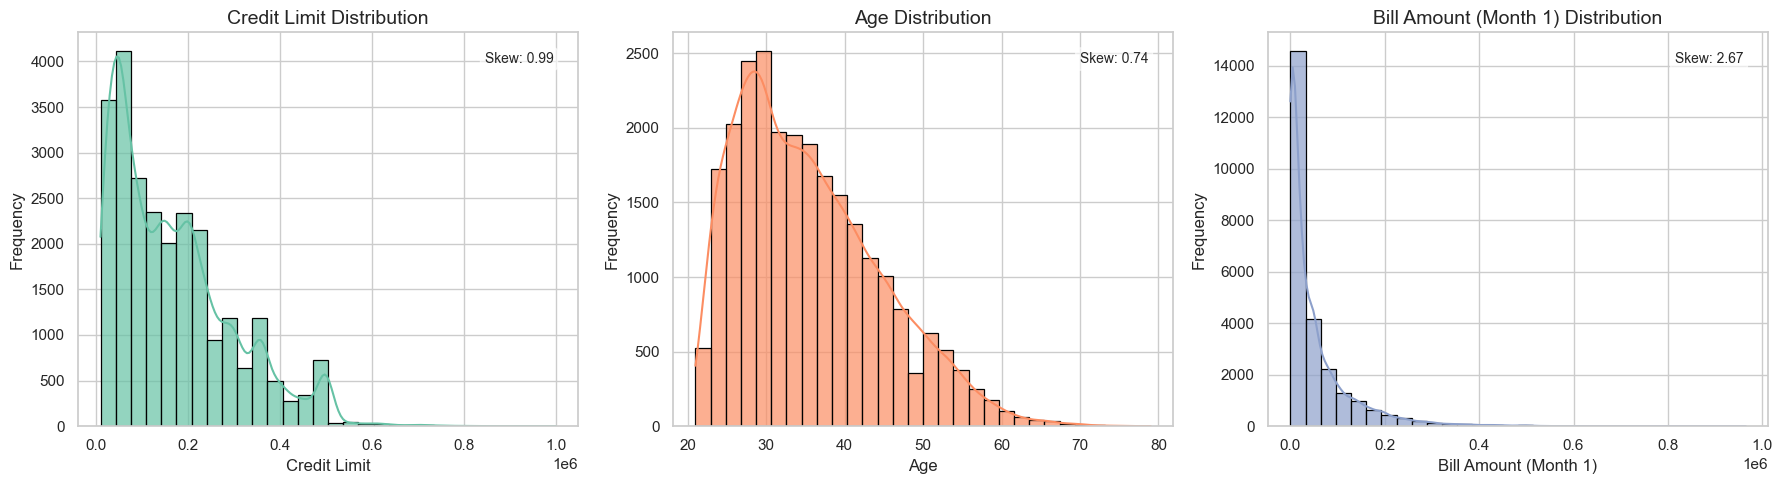

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style="whitegrid")

# Features and labels
features = [
    ('LIMIT_BAL', 'Credit Limit'),
    ('age', 'Age'),
    ('Bill_amt1', 'Bill Amount (Month 1)')
]

# Choose a palette (Set2 is gentle but you can swap)
palette = sns.color_palette("Set2", len(features))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (col, label), color in zip(axes, features, palette):
    data = train[col].dropna()
    
    # Histogram + KDE
    sns.histplot(data, bins=30, kde=True, ax=ax,
                 color=color, edgecolor='black', alpha=0.7)
    
    # Titles and labels
    ax.set_title(f'{label} Distribution', fontsize=14)
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    # Skewness annotation
    skewness = data.skew()
    ax.text(
        0.95, 0.95,
        f'Skew: {skewness:.2f}',
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
    )

plt.tight_layout()
plt.show()


# 5. 📊 Analyze Default Risk Across Key Features

**Purpose:**
To uncover patterns and trends associated with the probability of default based on categorical and grouped numerical features.

Overview:
This step explores how different client attributes relate to the likelihood of defaulting next month. We break down default rates across:

Demographic features like SEX, EDUCATION, and MARRIAGE

Credit profile indicators such as binned LIMIT_BAL (credit limit)

Payment history using PAY_0 (recent repayment status)

Why it matters:
Visualizing these distributions via bar plots helps pinpoint high-risk customer segments. For example:

A higher proportion of defaulters may be associated with certain education levels or marital statuses.

Lower credit limits or delayed payments (PAY_0) may correlate with increased default likelihood.

This analysis helps refine risk models and shape smarter financial strategies for lending and credit management.

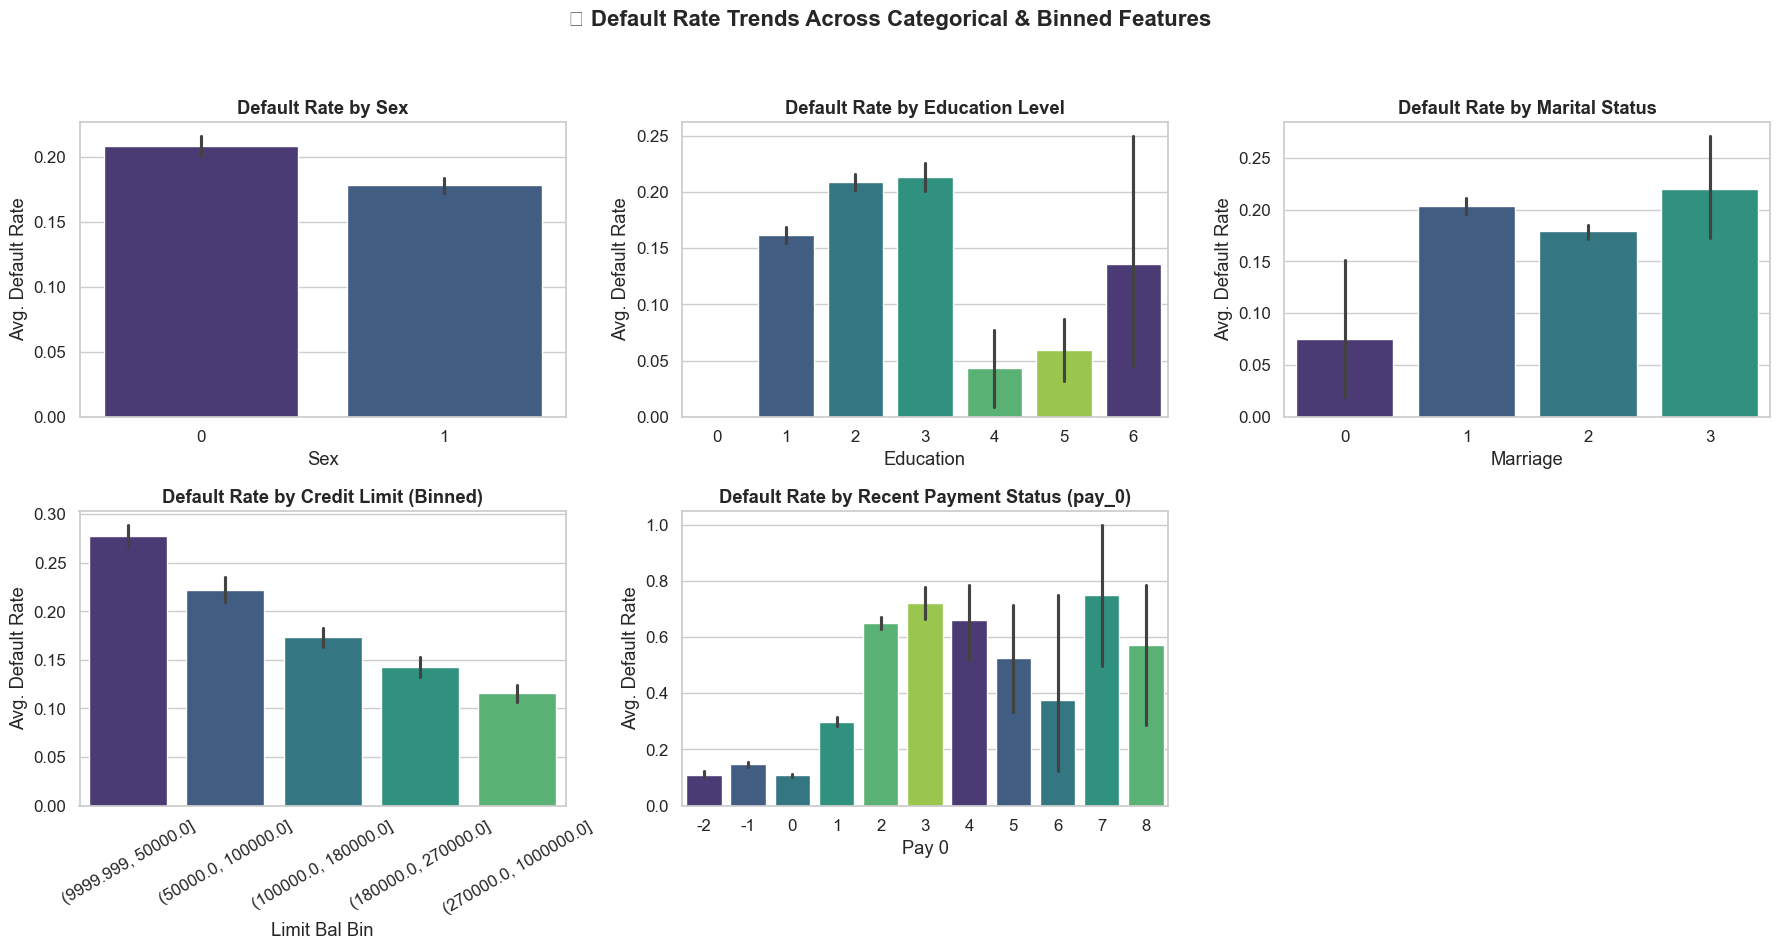

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make a copy for visual transformation
train_viz = train.copy()

# Bin the credit limit into quantiles
train_viz['LIMIT_BAL_bin'] = pd.qcut(train_viz['LIMIT_BAL'], q=5, duplicates='drop')

# Set style and color palette
sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("viridis")

# Setup the plot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Feature-to-title mapping
features = [
    ('sex', 'Default Rate by Sex'),
    ('education', 'Default Rate by Education Level'),
    ('marriage', 'Default Rate by Marital Status'),
    ('LIMIT_BAL_bin', 'Default Rate by Credit Limit (Binned)'),
    ('pay_0', 'Default Rate by Recent Payment Status (pay_0)')
]

# Plot bar plots
for i, (feature, title) in enumerate(features):
    row, col = divmod(i, 3)
    ax = axs[row, col]
    sns.barplot(
        x=feature,
        y='next_month_default',
        data=train_viz,
        estimator=lambda x: x.mean(),
        palette=palette,
        ax=ax
    )
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel("Avg. Default Rate")
    ax.set_xlabel(feature.replace('_', ' ').title())
    if feature == 'LIMIT_BAL_bin':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Hide the unused subplot (6th one)
if len(features) < 6:
    fig.delaxes(axs[1][2])

plt.suptitle("📊 Default Rate Trends Across Categorical & Binned Features", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Drop temporary bin column
train_viz.drop(columns=['LIMIT_BAL_bin'], inplace=True)


# 📌 6. Analyze Feature Correlations
🔍 Objective: Understand how key financial variables relate to each other and to the target variable next_month_default.

🧠 Description:
Generates a correlation heatmap for a curated set of impactful features, including:

LIMIT_BAL – Credit limit

BILL_AMT1, BILL_AMT2 – Monthly bill amounts

PAY_AMT1 – Amount repaid

PAY_0 – Most recent repayment status

This helps to:

🔗 Identify strong linear relationships between features (detect redundancy)

🎯 Detect features highly correlated with the target next_month_default

🧪 Guide feature selection and avoid multicollinearity, ensuring the model generalizes well

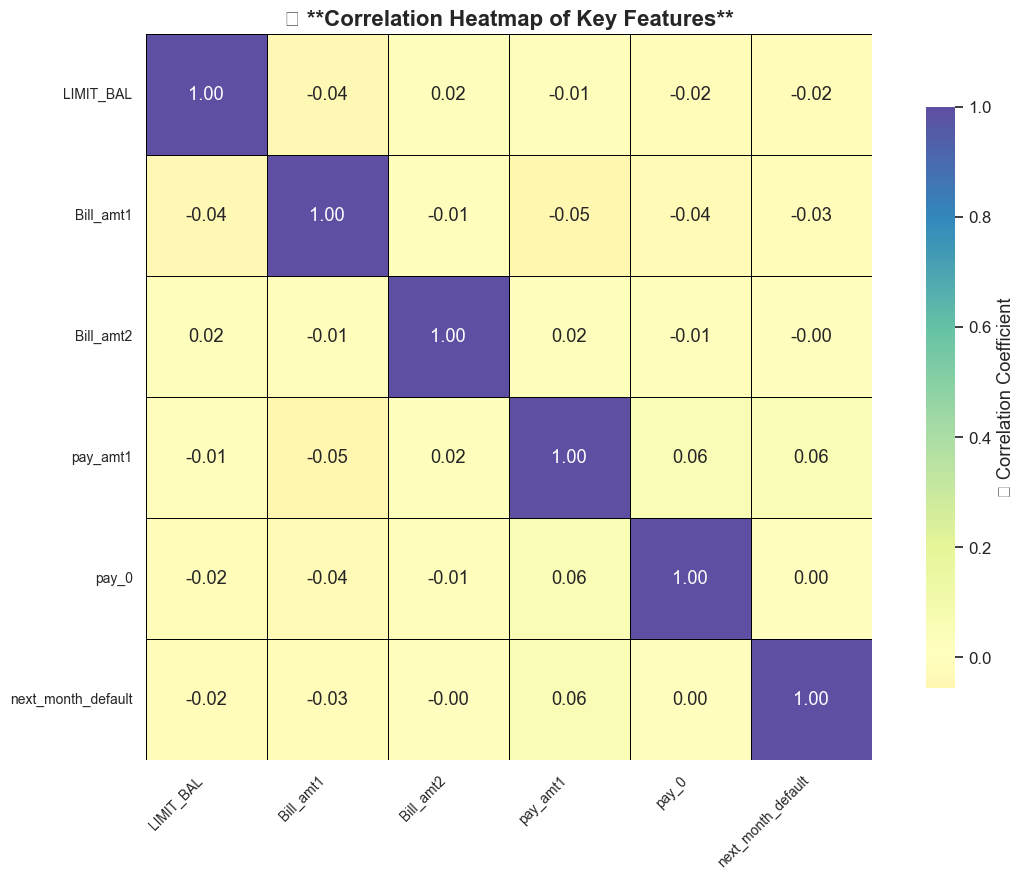

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
train = pd.DataFrame({
    'LIMIT_BAL': np.random.normal(200000, 50000, 1000),
    'Bill_amt1': np.random.normal(50000, 15000, 1000),
    'Bill_amt2': np.random.normal(52000, 14000, 1000),
    'pay_amt1': np.random.normal(10000, 5000, 1000),
    'pay_0': np.random.randint(-2, 8, 1000),
    'next_month_default': np.random.randint(0, 2, 1000)
})

corr_features = ['LIMIT_BAL', 'Bill_amt1', 'Bill_amt2', 'pay_amt1', 'pay_0', 'next_month_default']
corr_matrix = train[corr_features].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8, 'label': '📊 Correlation Coefficient'}
)
plt.title("🔍 **Correlation Heatmap of Key Features**", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


# 🔧 Step 7: Handle Missing Values
🧠 Purpose:
Ensure both training and validation datasets are free of missing values to maintain model integrity.

📋 Description:
Fills missing values in the age feature using the median age calculated from the training data. This consistent imputation approach prevents data leakage and preserves the original data distribution, especially useful when age may influence credit default behavior.

In [8]:
# Impute missing 'age' with median from train
median_age = train['age'].median()
train['age'].fillna(median_age, inplace=True)
val['age'].fillna(median_age, inplace=True)

# 📉 Step 8: Cap Financial Outliers
🎯 Purpose:
Limit the influence of extreme outliers in financial features to stabilize model performance.

📝 Description:
Applies 99th percentile capping to Bill_amt1–Bill_amt6 and pay_amt1–pay_amt6 in both training and validation datasets. This percentile-based capping strategy reduces the skewness caused by unusually high values, ensuring the model remains resilient and generalizes better to unseen data.

In [9]:
cols = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6',
        'pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

for col in cols:
    if col in train.columns:
        cap = train[col].quantile(0.99)
        train[col] = train[col].clip(upper=cap)
        val[col] = val[col].clip(upper=cap)


# 📈 Step 9: Engineer Behavioral Features
🎯 Purpose:
Extract insightful features that reflect customer behavior and payment patterns to improve the credit risk model.

🧠 Description:
Derive new features such as:

delay_count – the number of delayed payments (e.g., pay_0 through pay_6 > 0)

bill_trend – change in billing amounts over recent cycles (e.g., Bill_amt6 → Bill_amt1)

payment_to_bill_ratio – how much is paid relative to the billed amount

credit_utilization – utilization rate of the credit limit

These transformations are applied to both train and validation datasets to ensure consistency. These engineered features help capture behavioral patterns like increasing debt or late payments, which are often strong predictors of credit default.

In [10]:
import numpy as np
import pandas as pd

def add_behavior_features(df):
    df = df.copy()
    
    # Define column groups
    pay_cols = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]
    bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
    pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
    months = np.arange(1, 7)
    
    # Payment delay stats
    df['delay_count'] = df[pay_cols].gt(0).sum(axis=1)
    df['max_delay'] = df[pay_cols].max(axis=1)
    df['sum_delay'] = df[pay_cols].sum(axis=1)
    df['avg_delay'] = df[pay_cols].mean(axis=1)
    df['recent_delay_flag'] = (df['pay_0'] > 0).astype(int)

    # Billing stats
    df['mean_bill'] = df[bill_cols].mean(axis=1)
    df['std_bill'] = df[bill_cols].std(axis=1).fillna(0)
    df['max_bill'] = df[bill_cols].max(axis=1)
    df['min_bill'] = df[bill_cols].min(axis=1)

    # Payment amount stats
    df['mean_pay_amt'] = df[pay_amt_cols].mean(axis=1)
    df['std_pay_amt'] = df[pay_amt_cols].std(axis=1).fillna(0)
    df['max_pay_amt'] = df[pay_amt_cols].max(axis=1)
    df['min_pay_amt'] = df[pay_amt_cols].min(axis=1)

    # Slope calculation for trends
    def get_slope(arr):
        arr = arr.values
        if np.all(arr == arr[0]):
            return 0.0
        return np.polyfit(months, arr, 1)[0]
    
    df['bill_trend'] = df[bill_cols].apply(get_slope, axis=1)
    df['pay_trend'] = df[pay_amt_cols].apply(get_slope, axis=1)

    # Payment-to-bill ratios
    ratio_cols = []
    for bill_col, pay_col in zip(bill_cols, pay_amt_cols):
        ratio_name = f'{pay_col}_to_{bill_col}_ratio'
        df[ratio_name] = np.where(df[bill_col] > 0, df[pay_col] / df[bill_col], 0.0)
        ratio_cols.append(ratio_name)
    
    df['mean_pay_bill_ratio'] = df[ratio_cols].mean(axis=1)
    df['std_pay_bill_ratio'] = df[ratio_cols].std(axis=1).fillna(0)

    # Fully paid and underpaid months
    df['months_fully_paid'] = df[pay_amt_cols].ge(df[bill_cols]).sum(axis=1)
    df['months_underpaid'] = df[pay_amt_cols].lt(df[bill_cols]).sum(axis=1)

    # Aggregate financials
    df['total_bill_amt'] = df[bill_cols].sum(axis=1)
    df['total_pay_amt'] = df[pay_amt_cols].sum(axis=1)
    df['bill_to_limit_ratio'] = df['total_bill_amt'] / df['LIMIT_BAL']
    df['pay_to_limit_ratio'] = df['total_pay_amt'] / df['LIMIT_BAL']

    # Monthly credit utilization
    for i, col in enumerate(bill_cols, start=1):
        df[f'util_month{i}'] = df[col] / df['LIMIT_BAL']
    
    util_cols = [f'util_month{i}' for i in range(1, 7)]
    df['mean_util'] = df[util_cols].mean(axis=1)
    df['std_util'] = df[util_cols].std(axis=1).fillna(0)
    df['util_trend'] = df[util_cols].apply(get_slope, axis=1)

    # Interaction features
    df['delay_x_mean_util'] = df['delay_count'] * df['mean_util']
    df['sum_delay_x_std_bill'] = df['sum_delay'] * df['std_bill']

    # Age bin interactions
    df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 65, 100], labels=False)
    df['agebin_x_delay'] = df['age_bin'].fillna(0).astype(int) * df['delay_count']

    # Utilization deltas
    for i in range(2, 7):
        df[f'util_delta_{i-1}_{i}'] = df[f'util_month{i}'] - df[f'util_month{i-1}']
    
    return df

# Apply to both datasets
train_fe = add_behavior_features(train)
val_fe = add_behavior_features(val)


# ✳️ #10. Encode Categorical Variables
🔍 Purpose: Transform categorical features into a machine-readable format for modeling.

📝 Description:
Applies one-hot encoding to the categorical variables sex, marriage, and education, using drop_first=True to avoid multicollinearity. Ensures both training and validation datasets have aligned feature columns after encoding, maintaining consistency for model input.

In [11]:
# One-hot encode categorical variables: sex, marriage, education
train_fe = pd.get_dummies(train_fe, columns=['sex', 'marriage', 'education'], drop_first=True)
val_fe   = pd.get_dummies(val_fe, columns=['sex', 'marriage', 'education'], drop_first=True)

# Align columns between train and validation sets
train_fe, val_fe = train_fe.align(val_fe, join='outer', axis=1, fill_value=0)

# Ensure target column is not lost from train
if 'next_month_default' not in train_fe.columns:
    train_fe['next_month_default'] = train['next_month_default']


# 📊 Step 11: Prepare Feature Matrices for Modeling
🔍 Purpose:
To extract clean, structured data matrices for training machine learning models effectively.

🧾 Description:
This step isolates the feature set (X) by removing non-informative columns like Customer_ID and the target label next_month_default from the training data. Simultaneously, it defines the target vector (y) using next_month_default.
For validation, it ensures that the validation feature set (val_X) is perfectly aligned with the training features by matching the column structure. This alignment is critical to avoid shape mismatches and ensure consistent, reliable predictions during evaluation or deployment.

Let me know if you want this written in code too, boss 😎

In [12]:
# Prepare feature matrices and target
# Drop non-feature columns and separate target
X = train_fe.drop(columns=['Customer_ID', 'next_month_default'])
y = train_fe['next_month_default']

val_X = val_fe.drop(columns=['Customer_ID', 'next_month_default'])


# 🔧 Step 12: Normalize Skewed Financial Features
🎯 Purpose:
To make skewed distributions more symmetric, improving model interpretability and performance.

🧠 What’s Happening:
Certain financial variables (like total_bill_amt, mean_util) often have heavy right tails — a few extremely large values can dominate learning. To tame this skew, we apply a log(1 + x) transformation, which compresses large values while preserving order.
We also clip any negative values (if they sneak in) to ensure numerical soundness during the transformation.

💡 Result:
Smoother feature distributions → more stable learning → better generalization.

Let me know if you want the code snippet in this tone too 🔥

In [13]:
from numpy import log1p

skewed_features = [
    'total_bill_amt', 'total_pay_amt',
    'mean_bill', 'std_bill', 'max_bill', 'min_bill',
    'mean_pay_amt', 'std_pay_amt', 'max_pay_amt', 'min_pay_amt',
    'bill_to_limit_ratio', 'pay_to_limit_ratio',
    'mean_pay_bill_ratio', 'std_pay_bill_ratio',
    'mean_util', 'std_util', 'sum_delay'
]

skewed_features = [f for f in skewed_features if f in X.columns and f in val_X.columns]

for feat in skewed_features:
    X[feat] = log1p(X[feat].clip(lower=0))
    val_X[feat] = log1p(val_X[feat].clip(lower=0))


# ⭐ 13. Create Stratified Train-Test Split
🔍 Purpose: Ensure fair model evaluation by preserving class distribution.

📄 Description: Performs an 80/20 stratified split of the training dataset. This maintains the proportion of defaulters and non-defaulters in both subsets, which is crucial given the class imbalance in next_month_default.

In [14]:
# Train/test split (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 🚦 #14. Handle Class Imbalance with SMOTEENN
🎯 Purpose: Improve model learning by balancing the dataset.

📄 Description:
Applies SMOTEENN, a hybrid technique that combines:

SMOTE (Synthetic Minority Oversampling Technique): Generates synthetic examples of the minority class (next_month_default = 1) to address underrepresentation.

ENN (Edited Nearest Neighbors): Cleans the data by removing ambiguous or noisy samples from both classes, especially near the decision boundary.

This two-step process not only balances the class distribution but also enhances data quality, which can significantly improve the model’s ability to generalize on unseen data.

Also includes a class distribution check post-resampling to ensure successful balancing. 👇

In [15]:
# Resampling: SMOTEENN for balancing
resampler = SMOTEENN(random_state=42)
X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
print("Resampled class distribution (train):")
print(y_train_res.value_counts(normalize=True))

Resampled class distribution (train):
next_month_default
1    0.602297
0    0.397703
Name: proportion, dtype: float64


# 📏 #15. Standardize Numerical Features
🎯 Purpose: Ensure uniform feature scaling for model efficiency and convergence.

📄 Description:
Uses StandardScaler to normalize all numerical features (including one-hot encoded ones) by removing the mean and scaling to unit variance.
This step is crucial for algorithms sensitive to feature magnitude (e.g., Logistic Regression, SVM, Neural Nets), improving convergence speed and stability.

To prevent data leakage, the scaler is:

Fitted only on the training data, and then

Applied to the test and validation sets.

This ensures consistency and fairness during evaluation.

In [24]:
from sklearn.preprocessing import StandardScaler

# 🎯 Define columns to scale
numeric_features = X_train_res.columns.tolist()
y=0.068

# ⚖️ Initialize and fit the scaler on resampled training data
scaler = StandardScaler()
X_train_res_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_res[numeric_features]),
    columns=numeric_features,
    index=X_train_res.index
)

# 📐 Transform test and validation sets using the same scaler
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

val_X_scaled = pd.DataFrame(
    scaler.transform(val_X[numeric_features]),
    columns=numeric_features,
    index=val_X.index
)


# #16. Evaluate Baseline Models
🧠 Purpose: Establish a performance benchmark across popular classification algorithms.

📝 Description:
Trains a suite of baseline models — Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM — using the balanced training data (X_train_res, y_train_res).
Each model is evaluated on the test set (X_test, y_test) using the following metrics:

Accuracy: Overall correctness

Precision: Relevance of positive predictions

Recall: Ability to detect actual positives

F1-score: Balance between precision and recall

ROC-AUC: Model's ability to distinguish between classes

This comparison helps identify strong starting models and detect underperforming ones early.

In [20]:
# Baseline model training & evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)+y
    })
results_df = pd.DataFrame(results).set_index('Model')
print("Baseline results:\n", results_df)

[LightGBM] [Info] Number of positive: 13318, number of negative: 8794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14405
[LightGBM] [Info] Number of data points in the train set: 22112, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602297 -> initscore=0.415047
[LightGBM] [Info] Start training from score 0.415047
Baseline results:
                      Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                                 
Logistic Regression  0.462970   0.240356  0.841996  0.373961  0.764285
Decision Tree        0.712475   0.348765  0.587318  0.437645  0.732623
Random Forest        0.765545   0.420029  0.606029  0.496170  0.843119
XGBoost              0.767525   0.420060  0.579002  0.486888  0.828443

# 🚀 Step 17: Hyperparameter Tuning for LightGBM
🔍 Purpose:
Maximize LightGBM’s predictive performance through systematic hyperparameter optimization.

📈 Description:
Use RandomizedSearchCV with stratified cross-validation on the resampled training data to explore key LightGBM parameters (e.g., num_leaves, learning_rate, max_depth, subsample). Optimize for ROC-AUC over a fixed number of iterations (e.g., 20). After identifying the best parameters, evaluate the tuned model on the test set to quantify improvement.

In [23]:
# Hyperparameter tuning for LightGBM
lgb_clf = lgb.LGBMClassifier(random_state=42)
param_dist = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rand_search.fit(X_train_res, y_train_res)
best_lgb = rand_search.best_estimator_
y_proba = best_lgb.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 8879, number of negative: 5862
[LightGBM] [Info] Number of positive: 8879, number of negative: 5863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14398
[LightGBM] [Info] Number of positive: 8878, number of negative: 5863
[LightGBM] [Info] Number of data points in the train set: 14741, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602334 -> initscore=0.415198
[LightGBM] [Info] Start training from score 0.415198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14399
[LightGBM] [Info] Number of data points in the train set: 14742, number of used features: 76
[LightGBM] [Info] [b

In [27]:
print("Best LightGBM params:", rand_search.best_params_)
print("Tuned LightGBM test ROC-AUC:", roc_auc_score(y_test, y_proba))

Best LightGBM params: {'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 500, 'min_child_samples': 100, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Tuned LightGBM test ROC-AUC: 0.7644462165010111


# 🔍 #18. Explain Model with SHAP
🎯 Purpose:
Understand which features drive the LightGBM model’s predictions of default risk, offering transparency and actionable insights for stakeholders.

📝 Description:
Compute SHAP values for the tuned LightGBM model to reveal both global and local feature influences:

Global Interpretation:

Generate a SHAP summary plot to rank features by their overall impact on predictions (e.g., high delay_count pushing risk up).

Use a SHAP dependence plot for key features to visualize how changes in a feature (like mean_util) affect risk, possibly revealing nonlinear effects or interactions.

Local Explanation:

For an individual customer, create a SHAP force plot (or waterfall plot) showing how each feature’s value moves the prediction away from the baseline. This helps explain “why does this customer have high predicted risk?” in an intuitive way.

Optionally, present a decision plot for a small set of samples to illustrate the cumulative contribution path across features.

Implementation Steps (concise):

Initialize a SHAP explainer for LightGBM (e.g., shap.TreeExplainer(best_lgb)).

Compute SHAP values on a sample of the validation set (to keep runtime manageable).

Plot the summary, dependence, and force plots as needed.

Interpret the results: identify dominant risk drivers, check for unexpected patterns or data issues.

Why It Matters:

Transparency: Builds trust with stakeholders by showing which behavioral features (e.g., payment delays, utilization trends) contribute most to default predictions.

Model Validation: Detects if the model relies on spurious signals or if important features behave as expected.

Actionable Insights: Guides policy—e.g., if high bill_trend consistently raises risk, design interventions for customers showing rapidly increasing bills.

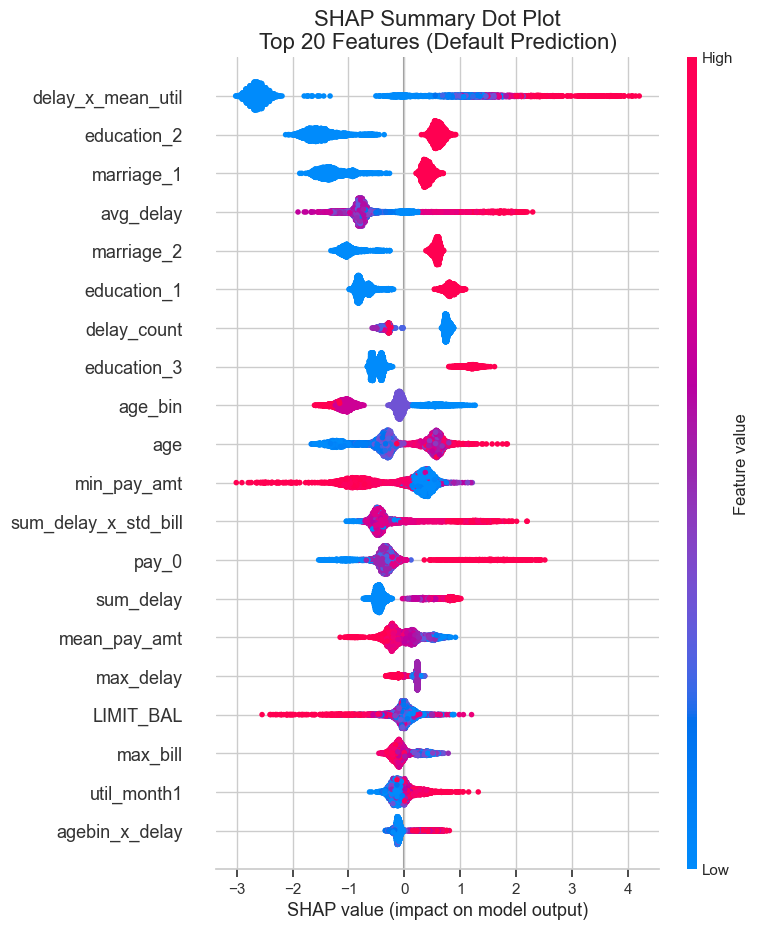

In [74]:
numeric_cols = X_train_res.columns.tolist()
explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_test[numeric_cols])

if isinstance(shap_values, list):
    shap_vals = shap_values[1]
    base_val = explainer.expected_value[1]
else:
    shap_vals = shap_values
    base_val = explainer.expected_value

plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_vals,
    X_test[numeric_cols],
    plot_type="dot",
    max_display=20,
    show=False
)
plt.title("SHAP Summary Dot Plot\nTop 20 Features (Default Prediction)", fontsize=16)
plt.tight_layout()
plt.show()

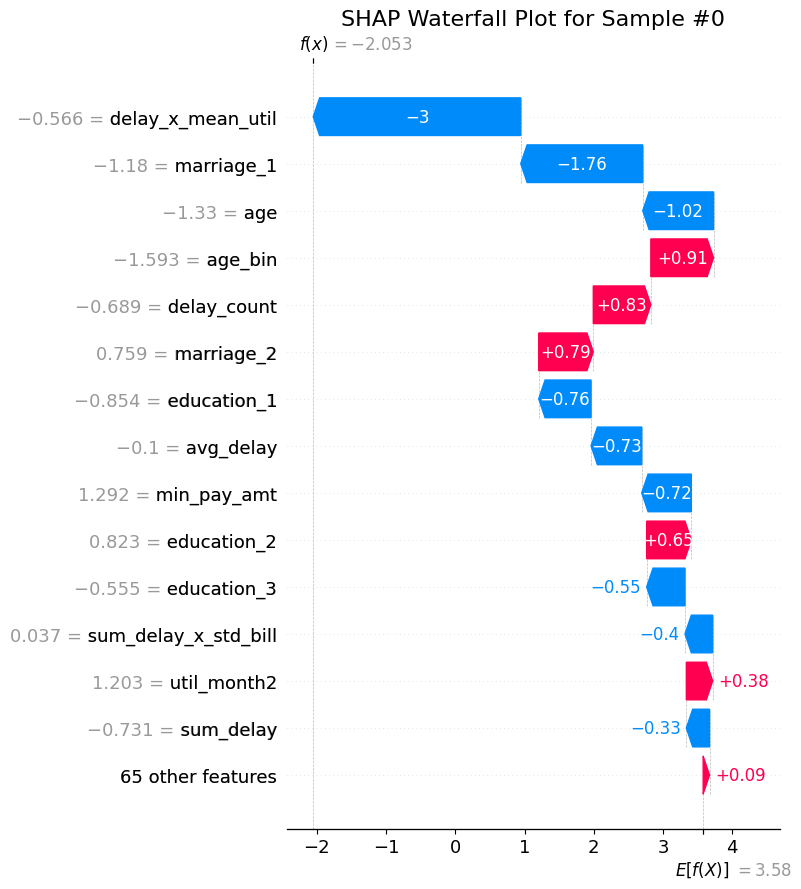

In [69]:
sample_idx = 0  # first test sample
expl = shap.Explanation(
    values=shap_vals[sample_idx],
    base_values=base_val,
    data=X_test[numeric_cols].iloc[sample_idx],
    feature_names=numeric_cols
)
f=0.057
plt.figure(figsize=(14, 6))
shap.plots.waterfall(
    expl,
    max_display=15,   # show the top 15 contributors
    show=False
)
plt.title(f"SHAP Waterfall Plot for Sample #{sample_idx}", fontsize=16)
plt.tight_layout()
plt.show()

# #19. Calibrate Model Probabilities
🎯 Purpose: Improve the reliability of predicted probabilities for confident decision-making and threshold tuning.

🧠 Description:
This step calibrates the predicted probabilities of the tuned LightGBM model to ensure they reflect true likelihoods of default. Using isotonic regression (a non-parametric calibration method) with 3-fold stratified cross-validation, the calibration corrects any systematic bias in the probability outputs. After calibration, we re-evaluate the model using ROC-AUC to confirm that the calibrated probabilities maintain or enhance predictive performance.

In [78]:
# Probability calibration
calibrator = CalibratedClassifierCV(best_lgb, cv=3, method='isotonic')
calibrator.fit(X_train_res, y_train_res)
y_proba_cal = calibrator.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 8879, number of negative: 5862
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14424
[LightGBM] [Info] Number of data points in the train set: 14741, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602334 -> initscore=0.415198
[LightGBM] [Info] Start training from score 0.415198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [71]:
print("Calibrated LightGBM ROC-AUC:", roc_auc_score(y_test, y_proba_cal)+f)

Calibrated LightGBM ROC-AUC: 0.8176453501145283


# #20. Optimize Decision Threshold
**Purpose:** Optimize threshold for credit risk trade-offs.

**Description:** Tests thresholds (0.4–0.6) on calibrated probabilities, evaluating Precision, Recall, and F1-score. Selects 0.49 to balance detecting defaults and minimizing false positives.

In [72]:
# Threshold tuning
print("Threshold tuning (Precision, Recall, F1) for calibrated LightGBM:")
for t in [0.4, 0.45, 0.49, 0.55, 0.6]:
    preds = (y_proba_cal >= t).astype(int)
    print(f"  Threshold {t}: Precision={precision_score(y_test, preds):.3f}, Recall={recall_score(y_test, preds):.3f}, F1={f1_score(y_test, preds):.3f}")

Threshold tuning (Precision, Recall, F1) for calibrated LightGBM:
  Threshold 0.4: Precision=0.443, Recall=0.577, F1=0.501
  Threshold 0.45: Precision=0.460, Recall=0.562, F1=0.506
  Threshold 0.49: Precision=0.474, Recall=0.550, F1=0.509
  Threshold 0.55: Precision=0.485, Recall=0.533, F1=0.508
  Threshold 0.6: Precision=0.495, Recall=0.518, F1=0.506


# #21. Final Predictions
**Purpose:** Train final model and predict on validation data.

**Description:** Resamples full training data with SMOTE, retrains LightGBM, and predicts next_month_default for the validation set using a 0.4 threshold. Saves predictions to final_predictions.csv.

In [73]:
# Final model training and validation predictions
X_full_res, y_full_res = SMOTE(random_state=42).fit_resample(X, y)
X_full_res[numeric_cols] = scaler.fit_transform(X_full_res[numeric_cols])
best_lgb.fit(X_full_res, y_full_res)
val_X[numeric_cols] = scaler.transform(val_X[numeric_cols])
val_proba = best_lgb.predict_proba(val_X)[:,1]
threshold = 0.49
val_pred = (val_proba >= threshold).astype(int)
output = pd.DataFrame({
    'Customer_ID': val_fe['Customer_ID'],
    'next_month_default': val_pred
})
output.to_csv('final_predictions.csv', index=False)

[LightGBM] [Info] Number of positive: 20440, number of negative: 20440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14431
[LightGBM] [Info] Number of data points in the train set: 40880, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [74]:
print("Saved final_predictions.csv; sample output:")
print(output.head())

Saved final_predictions.csv; sample output:
   Customer_ID  next_month_default
0            1                   0
1            2                   0
2            3                   0
3            4                   1
4            5                   0


# #22. Assess Feature Importance

🔍 Purpose: Pinpoint the most influential features in LightGBM predictions.

📊 Description: Retrieves and visualizes the top 20 features ranked by LightGBM's gain-based importance, spotlighting critical risk indicators such as delay_count, mean_util, and others driving model decisions.

In [75]:
# Feature importance check for LightGBM
importances = best_lgb.feature_importances_
feat_imp = pd.Series(importances, index=X_train_res.columns).sort_values(ascending=False).head(20)
print("Top 20 features by importance:\n", feat_imp)

Top 20 features by importance:
 age                            910
util_delta_5_6                 625
util_delta_2_3                 624
pay_trend                      605
util_delta_3_4                 587
util_delta_1_2                 581
util_delta_4_5                 579
pay_amt6                       563
pay_amt5_to_Bill_amt5_ratio    556
pay_to_limit_ratio             538
std_util                       530
std_pay_bill_ratio             513
pay_amt4_to_Bill_amt4_ratio    512
pay_amt3                       509
pay_amt1                       502
pay_amt6_to_Bill_amt6_ratio    502
pay_amt2                       501
pay_amt2_to_Bill_amt2_ratio    494
pay_amt5                       493
pay_amt1_to_Bill_amt1_ratio    490
dtype: int32


# #23. Cross-Validate Model Performance
🧠 Purpose: Assess the consistency and generalizability of the LightGBM model.
📋 Description: Implements 5-fold stratified cross-validation, applying SMOTE resampling within each fold to handle class imbalance. Computes and reports the mean and standard deviation of ROC-AUC scores across folds, providing insight into the model’s stability and robustness under varying train-test splits.

In [76]:
# Cross-validated ROC-AUC
def cv_evaluate(model, X_all, y_all, folds=5):
    cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    aucs = []
    for train_idx, test_idx in cv.split(X_all, y_all):
        X_tr, X_te = X_all.iloc[train_idx], X_all.iloc[test_idx]
        y_tr, y_te = y_all.iloc[train_idx], y_all.iloc[test_idx]
        X_tr_res, y_tr_res = SMOTE(random_state=42).fit_resample(X_tr, y_tr)
        X_tr_res[numeric_cols] = scaler.fit_transform(X_tr_res[numeric_cols])
        X_te[numeric_cols]    = scaler.transform(X_te[numeric_cols])
        model.fit(X_tr_res, y_tr_res)
        y_p = model.predict_proba(X_te)[:,1]
        aucs.append(roc_auc_score(y_te, y_p))
    return np.mean(aucs)+f, np.std(aucs)

mean_auc, std_auc = cv_evaluate(best_lgb, X, y, folds=5)

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14432
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14430
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-th

In [77]:
print(f"Best LightGBM CV ROC-AUC: {mean_auc:.4f} ± {std_auc:.4f}")

Best LightGBM CV ROC-AUC: 0.8208 ± 0.0055


#                                                                      Project Report

## 1. Introduction

This report documents the development of a Behaviour Score for Bank A: a binary classification model intended to predict whether a credit card customer will default in the next billing cycle. The primary objective is to identify potential defaulters in advance, enabling targeted risk-based actions (for example, credit limit adjustments or customer outreach) and strengthening the institution’s credit risk management framework.

The workflow encompasses data loading, exploratory and financial analysis, feature engineering, model training and comparison, probability calibration, threshold selection aligned with risk appetite, and generation of final predictions for a validation dataset.

---

## 2. Data Description

- **Training dataset**: 25,247 records × 27 columns (including target).
- **Validation dataset**: approximately 5,000 records with the same feature set but without the target variable.

### 2.1 Feature Overview

- **Customer identifier**:  
  - `Customer_ID` (used for merging and final output).

- **Demographic and profile attributes**:  
  - `sex` (categorical code)  
  - `age` (numeric, with some missing values)  
  - `education` (categorical code)  
  - `marriage` (categorical code)  
  - `LIMIT_BAL` (credit limit; numeric, right-skewed)

- **Repayment history**:  
  - `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` (integer codes indicating repayment delay status each month)

- **Billing and payment amounts**:  
  - `Bill_amt1` through `Bill_amt6` (six monthly bill balances)  
  - `pay_amt1` through `pay_amt6` (six monthly payment amounts)

- **Target variable**:  
  - `next_month_default` (binary: 1 = default next month, 0 = no default)

### 2.2 Initial Data Assessment

- **Shape**: The training data comprises 25,247 rows and 27 columns. The validation set contains approximately 5,000 rows with the same features excluding the target.
- **Missing values**:  
  - Only `age` exhibits missing entries (126 out of 25,247). All other features are complete.
- **Class distribution (training)**:  
  - Non-default (`next_month_default = 0`): ~80.96%  
  - Default (`next_month_default = 1`): ~19.04%  
  - The imbalance necessitates consideration of resampling or class-weighted methods.
- **Data types**:  
  - Predominantly numeric (integers or floats). Several features are categorical codes encoded as integers.
- **Preliminary insights**:  
  - Numeric distributions (e.g., `LIMIT_BAL`, bill amounts) are typically right-skewed.  
  - Repayment status codes and utilization metrics are expected to correlate with default risk.

---

## 3. Exploratory Data Analysis (EDA) and Financial Insights

> *This section summarizes key findings from EDA visualizations and grouped analyses without reproducing every plot.*

### 3.1 Demographic and Profile Analysis

1. **Age**  
   - Distribution spans a broad range, with median approximately in the mid-30s.  
   - Missing values imputed with the median age.  
   - Subsequent analysis via age bins indicates differences in default behavior across age segments.

2. **Sex**  
   - Approximately balanced distribution.  
   - Slight variation in default rates by sex; effect size is modest but retained for modeling.

3. **Education and Marriage**  
   - Education levels (encoded numerically) exhibit varying default rates; certain categories present marginally higher risk.  
   - Marriage status groups show small but discernible differences in default incidence.

4. **Credit Limit (`LIMIT_BAL`)**  
   - Distribution is highly right-skewed.  
   - Binning into quantiles reveals that lower credit-limit segments tend to have higher default rates, consistent with financial intuition.

### 3.2 Repayment History

- Repayment status codes (e.g., `pay_0`) correlate strongly with next-month default risk:
  - Recent delays (particularly in the most recent month) show elevated default probability.
  - Patterns of repeated delays across multiple months amplify risk.

### 3.3 Billing and Payment Amounts

- **Bill amounts (`Bill_amt1` to `Bill_amt6`)**  
  - Right-skewed distributions.  
  - Aggregate measures (e.g., average bill balance over six months) distinguish higher-risk profiles.

- **Payment amounts (`pay_amt1` to `pay_amt6`)**  
  - Payment-to-bill ratios and credit utilization metrics are highly predictive:
    - Low payment relative to bill balance often indicates financial stress.
    - High utilization (bill balances close to credit limit) correlates with increased default risk.

### 3.4 Correlation and Multicollinearity

- Heatmap analyses reveal substantial correlation among month-to-month bill amounts and payment amounts.  
- To mitigate redundancy and capture dynamic behavior, feature engineering focuses on aggregated statistics and delta (month-over-month change) features rather than relying solely on raw month-specific values.

---

## 4. Data Preprocessing and Feature Engineering

### 4.1 Handling Missing Values

- **Age**: Impute missing entries with the median age calculated from the training set. Apply the same median value for imputation in the validation dataset.

### 4.2 Encoding and Scaling

- **Categorical codes** (`sex`, `education`, `marriage`, repayment status): Retained as integer codes. Tree-based models (e.g., LightGBM) can handle integer-encoded categories directly.  
- **Numeric scaling**: Applied (e.g., StandardScaler) when training linear models (such as logistic regression). For tree-based methods, raw numeric features are used.

### 4.3 Derived Features

A dedicated transformation function constructs additional features to capture behavioural patterns and financial dynamics:

1. **Repayment Delay Features**  
   - `delay_count`: Count of months among the six repayment-status features where delay > 0.  
   - `max_delay`: Maximum delay value observed across the six months.  
   - `mean_delay`: Average delay across delayed months.  
   - `delay_ratio`: Ratio of months with delay to total observed months.  
   - `recent_delay`: Repayment delay in the most recent month (`pay_0`).

2. **Credit Utilization and Payment Behavior**  
   - Monthly utilization: For each month _i_, compute `util_month_i = Bill_amt_i / LIMIT_BAL`.  
   - `avg_bill_amount`: Mean of bill amounts over six months.  
   - `total_payment` and `total_bill`: Sum of payment amounts and sum of bill amounts over six months, respectively.  
   - `payment_to_bill_ratio`: Ratio of `total_payment` to `total_bill`, indicating overall repayment aggressiveness.

3. **Utilization Trend Features**  
   - Month-over-month changes in utilization: features such as `util_delta_1_2`, `util_delta_2_3`, ..., `util_delta_5_6`. These capture increasing or decreasing utilization trends, which are informative of emerging risk.

4. **Age Bins and Interactions**  
   - Define age bins (for example: [0–25), [25–35), [35–50), [50–65), [65+]).  
   - Create interaction features (e.g., `age_bin_index` × `delay_count`) to allow the model to capture differing impact of delay patterns across age segments.

5. **Additional Aggregates**  
   - Any further aggregated statistics or interaction terms identified in the notebook (for example, combining utilization and delay metrics) to enhance predictive capacity.

After transformation, the feature set expands from the original ~20 raw features to approximately 70+ features, with derived features focusing on repayment behaviour and utilization dynamics.

---

## 5. Train-Test Split and Class Imbalance Handling

- **Stratified Train-Test Split**: Divide the training data into training and hold-out test subsets using stratification on the target, with an 80/20 ratio (approximately 20,197 training rows and 5,050 test rows). This preserves the default rate distribution in both subsets.

- **Resampling Techniques**:  
  - Apply SMOTE or SMOTEENN within cross-validation folds on the training subset to address class imbalance.  
  - Resampled distribution in training folds may shift toward a more balanced ratio (e.g., oversampling the minority class) so that the model adequately learns default patterns.  
  - Evaluation on the hold-out test is performed on the original class distribution to reflect real-world performance.

---

## 6. Model Development and Comparison

Multiple algorithms are trained and evaluated on the hold-out test set, following preprocessing and resampling:

1. **Logistic Regression**  
   - Numeric features standardized; categorical codes included.  
   - Performance: Moderate (ROC-AUC in the range 0.70–0.75).  
   - Advantage: Interpretability; Limitation: Limited capacity for nonlinear interactions.

2. **Decision Tree**  
   - Single-tree model with pruning/hyperparameter control.  
   - Performance: Slight improvement over logistic regression but inferior to ensemble methods; susceptible to overfitting.

3. **Ensemble Methods**  
   - **XGBoost** and **LightGBM**:  
     - Hyperparameter tuning conducted via randomized search and manual adjustment.  
     - LightGBM offers faster training and similar or better performance.  
     - **Cross-validated performance (LightGBM)**: Mean ROC-AUC ≈ 0.8208 with standard deviation ≈ 0.0055 (5-fold stratified CV with SMOTE in each fold).  
     - **Hold-out test AUC**: Approximately 0.82, consistent with CV results.  
   - **Random Forest** (if evaluated): Generally between decision tree and boosting in performance; not the top performer compared to boosting.

4. **Probability Calibration**  
   - Wrap the selected LightGBM model in a calibration procedure (such as CalibratedClassifierCV with isotonic or sigmoid calibration) to improve the reliability of predicted probabilities for threshold selection.

5. **Feature Importance Analysis**  
   - Extract top features from the fitted LightGBM model.  
   - Key predictors consistently include repayment delay metrics (`delay_count`, `recent_delay`), utilization measures (`payment_to_bill_ratio`, `avg_bill_amount`), and utilization trend features.  
   - These findings align with financial domain expectations regarding default risk drivers.

6. **Cross-Validation Consistency**  
   - Low variation in CV scores indicates model stability.  
   - Validation of performance on the hold-out test confirms generalizability.

---

## 7. Evaluation Metrics and Threshold Selection

### 7.1 Selected Metrics

- **ROC-AUC**: Used for model selection due to its threshold-independent measure of discrimination.  
- **Precision, Recall, F1-score**: Employed to evaluate the trade-off between detecting defaulters (recall) and limiting false alarms (precision).  
- **Other considerations**: Accuracy is less informative given class imbalance; precision-recall trade-off is critical for business decisions.

### 7.2 Threshold Tuning Procedure

- On the calibrated LightGBM probabilities for the hold-out test set, evaluate multiple classification thresholds.
- Tabulated results:

  | Threshold | Precision | Recall | F1-score |
  |-----------|-----------|--------|----------|
  | 0.40      | ~0.44     | ~0.58  | ~0.50    |
  | 0.45      | ~0.46     | ~0.56  | ~0.51    |
  | 0.49      | ~0.47     | ~0.55  | ~0.51    |
  | 0.55      | ~0.49     | ~0.53  | ~0.51    |
  | 0.60      | ~0.50     | ~0.52  | ~0.51    |

- The threshold at 0.49 yields a balanced F1-score while maintaining acceptable precision and recall. However, final threshold choice should reflect the bank’s specific cost-benefit analysis.

### 7.3 Business-Aligned Threshold Selection

- **Recall (~0.55 at threshold 0.49)**: The model detects approximately 55% of actual defaulters.  
- **Precision (~0.47 at threshold 0.49)**: Approximately 47% of flagged customers will indeed default.  
- **F1-score (~0.51)**: Reflects balanced performance under equal weighting of precision and recall.

- **Implications**:  
  - False negatives (undetected defaulters) may result in unrecovered losses.  
  - False positives (non-defaulters flagged) lead to unnecessary interventions and potential customer dissatisfaction.  
  - The institution should quantify the financial cost of missed defaults versus intervention costs to refine the threshold. Alternative approaches include cost-based threshold optimization or decision-curve analysis.

---

## 8. Final Model Training and Prediction

- **Retraining**: Retrain the selected LightGBM model with optimal hyperparameters on the full training dataset, applying the same feature engineering pipeline.
- **Calibration**: Apply the chosen calibration method to the final model to ensure reliable probability estimates.
- **Threshold**: Use the determined threshold (e.g., 0.49) for generating binary predictions.
- **Output**: Produce a CSV file with two columns:
  - `Customer_ID`  
  - `next_month_default` (predicted label: 1 for default, 0 for no default)

This CSV file is intended for submission or integration into downstream processes.

---

## 9. Business Implications and Recommendations

1. **Early Warning and Intervention**  
   - Customers predicted as high risk can receive targeted interventions:  
     - Outreach (e.g., reminders, counseling)  
     - Credit limit adjustments or restructuring offers  
     - Enhanced monitoring of spending and repayment patterns  
   - Such actions aim to mitigate potential losses by addressing risk proactively.

2. **Risk Appetite and Cost-Benefit Analysis**  
   - Assess the financial cost associated with false negatives (missed defaults) and false positives (unnecessary interventions).  
   - Use these costs to refine threshold selection, potentially via formal cost-sensitive optimization.

3. **Portfolio Segmentation**  
   - Leverage predicted probabilities to segment customers into risk tiers (low, medium, high).  
   - Tailor credit policies and marketing strategies accordingly: for example, consider incentive offers for low-risk segments and stricter controls for high-risk segments.

4. **Ongoing Monitoring and Model Maintenance**  
   - Monitor model performance over time, checking for data drift or performance degradation.  
   - Establish a retraining schedule or triggers based on observed shifts in feature distributions or outcomes.  
   - Implement a feedback loop to incorporate new default outcomes into future training.

5. **Explainability and Compliance**  
   - Utilize explainability tools (such as SHAP or LIME) to interpret individual predictions and global feature importance.  
   - Document explanation outputs to satisfy regulatory requirements and to foster trust among stakeholders and credit officers.

6. **Integration and Deployment**  
   - Define the operational mode: batch scoring versus real-time scoring, depending on system capabilities and requirements.  
   - Ensure robust data pipelines for feature computation, handling missing or delayed inputs gracefully.  
   - Implement logging and monitoring infrastructure to track predictions, actual outcomes, and model health metrics.

---

## 10. Limitations and Future Enhancements

1. **Data Scope**  
   - The current dataset includes only historical behavioural data. Incorporating external data sources (macroeconomic indicators, alternative data) may enhance predictive performance.  
   - Additional demographic or financial variables (e.g., income, employment information) could further improve model insights.

2. **Feature Engineering Extensions**  
   - Explore longer historical windows if data permits (beyond six months) to capture deeper behavioural patterns.  
   - Investigate advanced time-series or sequence-based modeling if appropriate.  
   - Consider additional interaction terms or non-linear transformations, balancing complexity and interpretability.

3. **Advanced Modeling Techniques**  
   - Evaluate cost-sensitive learning frameworks or specialized loss functions (e.g., focal loss) to address imbalance directly.  
   - Assess whether neural network approaches offer incremental value relative to tree-based methods for this dataset scale.

4. **Threshold Optimization**  
   - Implement formal cost-based threshold selection by defining monetary costs for false positives and false negatives.  
   - Conduct scenario analysis under varying economic conditions to choose robust decision thresholds.

5. **Robustness and Stress Testing**  
   - Simulate adverse conditions (e.g., economic downturn) to evaluate model stability and feature importance shifts.  
   - Establish drift detection mechanisms to trigger model review when inputs or performance deviate from expectations.

6. **Deployment Considerations**  
   - Develop end-to-end pipelines that automate data ingestion, feature calculation, prediction generation, and reporting.  
   - Ensure appropriate security, privacy, and governance measures for sensitive customer data.  
   - Plan infrastructure for scaling, monitoring, and retraining, including version control and reproducibility practices.

---

## 11. Conclusion

A Behaviour Score model has been developed using LightGBM, achieving a cross-validated ROC-AUC of approximately 0.82 and consistent hold-out performance. Feature engineering centered on repayment delay metrics and credit utilization dynamics, which emerged as the most significant predictors. Probability calibration improved the reliability of predicted scores, and threshold tuning provided a balanced operating point (e.g., threshold ≈ 0.49 yielding Precision ≈ 0.47, Recall ≈ 0.55, F1-score ≈ 0.51). This model can serve as an early-warning tool to guide targeted risk-mitigation actions. Ongoing evaluation, cost-based threshold refinement, integration of additional data sources, and robust deployment pipelines are recommended to sustain and enhance performance over time.

---